<a href="https://colab.research.google.com/github/master1223347/Assorted-ML-Projects/blob/main/Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

For this assignment, you will use the dataset loaded below (or another appropriate dataset of your choice) to perform the following steps that were demonstrated in the practice Notebook.

**Do not delete any instructor-provided cells from this Notebook.** If you accidentally delete a cell, you can either undo the action or load a copy of the original assignment Notebook in a new browser tab and copy over the missing cells.

**You can add cells to this Notebook.** To add a markdown (text) cell, hover your cursor beneath the cell where you want to insert and click the "+Text" button. To add a Python (code) cell, click the "+Code" button.

### Steps
- Choose at least one feature to visualize.
- Standardize all appropriate numerical features.
- Use regression models to predict one feature against another.
  - Use a baseline regression model.
  - Use and compare all 4 real regression models below.
    - LinearRegression
    - Ridge
    - Lasso
    - ElasticNet
- Train a binary classifier.
  - Create a binary label vector.
  - Compare logistic regression against a baseline dummy classifier.
  - Choose an evaluation metric and report your findings.
- Train a multiclass classifier.
  - Fit a logistic regression model and make predictions.
  - Report your findings with a confusion matrix.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import dummy
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

The following variable will be used to set a random seed for certain processes. Using a seed makes random processes deterministic, meaning this notebook will do things like split data the same way on each run. You are free to change this value to explore how the notebook runs differently.

In [ ]:
seed = 42

## Load the Dataset



### Features

- `area`: Total area of the kernel, measured in mm squared.
- `perimeter`: Length of the outer boundary of the kernel, measured in mm.
- `compactness`: How closely the kernel’s shape approaches that of a perfect circle. Higher values indicate more compact (rounder) kernels.
- `length`: Longest dimension of the kernel, measured in mm.
- `width`: Widest dimension of the kernel, measured in millimeters.
- `asymmetry`: Measure of how asymmetric the kernel is. Higher values indicate more irregular or skewed shapes.
- `groove`: Length of the groove on the kernel, measured in mm. This is a physical feature important for distinguishing wheat varieties.

### Classes
One of three wheat types, labeled `1`, `2`, or `3`.

In [ ]:
columns = [
    "area", "perimeter", "compactness", "length", "width", "asymmetry",
    "groove", "wheat_type"
]
df = pd.read_csv(
    "https://archive.ics.uci.edu/static/public/236/seeds.zip",
    sep=r"\s+",       # Columns are separated by whitespace.
    index_col=False,  # Index not present in raw data.
    names=columns     # No header in raw data; use column names above.
)

Below, the feature matrix and label vector are separated as NumPy arrays. You do not need to modify this code.

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y.shape

((210, 7), (210,))

## Inspect the Data

For this step, the following scatterplot matrix is provided for you. You do not need to understand the code in this cell, though it may be helpful to be aware of the Pandas `scatter_matrix` method for future work.

In this scatterplot matrix, each feature is plotted against all other features. Along the main diagonal (from top-left to bottom-right) since there is no reason to plot the same feature against itself, a histogram of that feature is provided instead.

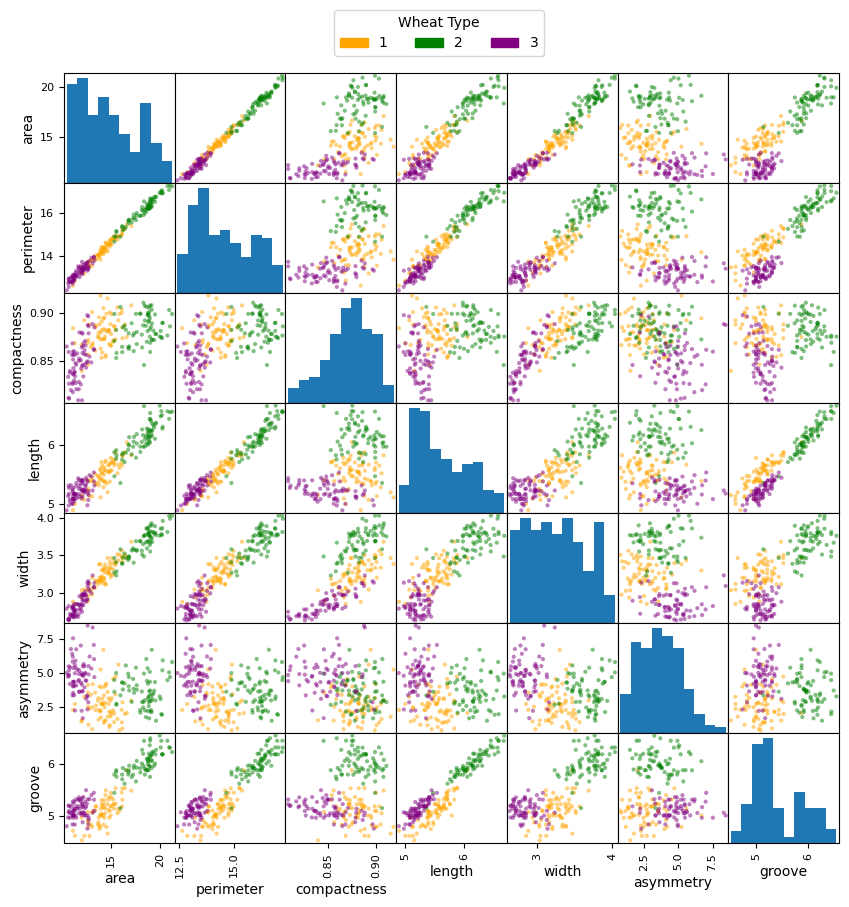

In [ ]:
import matplotlib.patches as mpatches

# Feel free to change if difficult to distinguish.
colors = ["orange", "green", "purple"]

cmap = {label: colors[label - 1] for label in np.unique(y)}
y_colors = df["wheat_type"].apply(lambda label: cmap[label])
handles = [
    mpatches.Patch(color=cmap[cls], label=str(cls))
    for cls in np.unique(y)
]

pd.plotting.scatter_matrix(df.iloc[:, :-1], figsize=(10, 10), c=y_colors)
fig = plt.gcf()
fig.legend(handles=handles, title="Wheat Type", bbox_to_anchor=(0.5, 0.95), loc="upper center", ncol=len(handles))
plt.show()

### Additional Visualizations

Create at least one additional non-scatterplot visualization to focus on one or more features of interest. Describe what you find below.

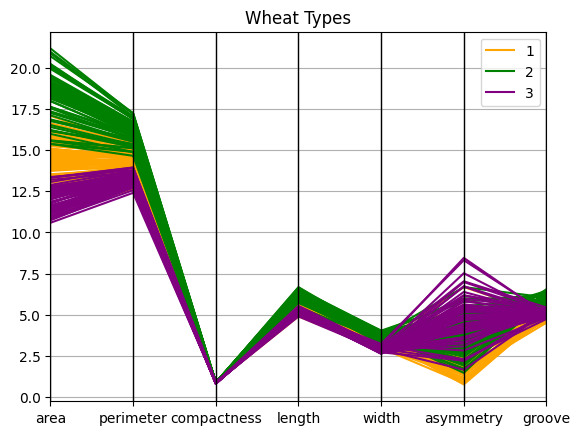

In [ ]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, "wheat_type", color=colors)
plt.title("Wheat Types")
plt.show()

### Report Findings

Wheat Types 1 and 2 kind of overlap, but Type 2 usually hits bigger area values, so it’s the biggest one. Type 3 on the other hand, stays on the smaller side, making it the tiniest of the three.

## Prepare the Data

Since the dataset is very small, we won't split it into training and test sets for this assignment. Instead, we'll use the whole dataset to explore linear models and their behavior.

### Scale the Features

Use `StandardScaler` to scale the feature matrix.

In [ ]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_scaled, y)
y_pred_log = log_reg.predict(X_scaled)

## Using Regression on Pairs of Features

Select a pair of features by looking at the scatterplot matrix above. Choose a pair that appear to have some correlation, but not a very strong one; in other words, it looks like a line would fit the data somewhat, but the data itself does not already form a line.

Name your pair of features, and then use the following regression models to predict one feature, given the other (similar to how petal length was used to predict petal width in the Practice Notebook).

- `DummyRegressor()`
- `LinearRegression()`
- `Ridge()`
- `Lasso()`
- `ElasticNet()`

### Features Chosen

I chose perimeter and groove

### Train Regression Models

Train each model and evaluate it (on the training data) using the RMSE. Answer these questions in the text cell provided below.
1. Were all models relatively similar, or did one perform better?
2. How did the real models do against the baseline?
3. Based on what you know of regularization (from the Canvas module), why do you think this outcome was the case?
4. Is there another pair of features that you suspect might perform differently?

#### Baseline (Dummy)

In [ ]:
dummy_reg = dummy.DummyRegressor()
dummy_reg.fit(X_scaled, y_pred_log)
y_pred_dummy = dummy_reg.predict(X_scaled)

In [ ]:
rmse = metrics.root_mean_squared_error(y_pred_log, y_pred_dummy)
rmse

0.8134498634040752

#### Real Regression Models

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_scaled, y_pred_log)
y_pred_lin = lin_reg.predict(X_scaled)
rmse = metrics.root_mean_squared_error(y_pred_log, y_pred_lin)
rmse

0.40279678545234077

In [ ]:
y_pred_lin.min(), y_pred_lin.max()

(np.float64(0.4750473175751577), np.float64(3.5293403666121383))

In [ ]:
ridge_reg = linear_model.Ridge()
ridge_reg.fit(X_scaled, y_pred_log)
y_pred_ridge = ridge_reg.predict(X_scaled)
rmse = metrics.root_mean_squared_error(y_pred_log, y_pred_ridge)
rmse

0.4408461789560465

In [ ]:
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_scaled, y_pred_log)
y_pred_lasso = lasso_reg.predict(X_scaled)
rmse = metrics.root_mean_squared_error(y_pred_log, y_pred_lasso)
rmse

0.8134498634040752

In [ ]:
elastic_reg = linear_model.ElasticNet()
elastic_reg.fit(X_scaled, y_pred_log)
y_pred_elastic = elastic_reg.predict(X_scaled)
rmse = metrics.root_mean_squared_error(y_pred_log, y_pred_elastic)
rmse

0.8134498634040752

### Report Findings

The linear regession model preformed the best, this is most probably because the two pieces of data follow a close line which is perfect for linear regression models

## Binary Classification

Based on the scatterplot matrix, choose one class that you believe may be easiest to distinguish from the others. Create a binary label vector (a vector containing only true/false values, as in the Practice Notebook) and perform binary classification using logistic regression. You can use any evaluation metric that you wish, but justify your decision when reporting on your results.

The perimeter class

### Create Binary Label Vector

In [ ]:
y_type_3_mask = (df["wheat_type"] == 3)
display(y_type_3_mask.value_counts())

,count
wheat_type,
False,140
True,70


### Provide a Baseline

Use `DummyClassifier`.

In [ ]:
dummy_clf = dummy.DummyClassifier(strategy="most_frequent", random_state=seed)
dummy_clf.fit(X_scaled, y_type_3_mask)
y_pred_dummy_clf = dummy_clf.predict(X_scaled)

In [ ]:
accuracy_dummy = metrics.accuracy_score(y_type_3_mask, y_pred_dummy_clf)
accuracy_dummy

0.6666666666666666

### Train a Logistic Regression Model

In [ ]:
log_reg_binary = linear_model.LogisticRegression(random_state=seed)
log_reg_binary.fit(X_scaled, y_type_3_mask)
y_pred_log_binary = log_reg_binary.predict(X_scaled)

### Choose a Metric for Evaluation

Use the same metric for the baseline and logistic regression models.

In [ ]:
accuracy_log_reg = metrics.accuracy_score(y_type_3_mask, y_pred_log_binary)
accuracy_log_reg

0.9619047619047619

### Justify Metric and Report Findings

Since we're using a binary classifcation to detect whether a wheat strain is wheat no. 3, we can use accuracy to see how much it got correct. The accuracy is 96.19%

## Multiclass Classification

Use logistic regression to predict the 3 classes given all the features.

In [ ]:
log_reg_multi = linear_model.LogisticRegression(random_state=seed)
log_reg_multi.fit(X_scaled, y)
y_pred = log_reg_multi.predict(X_scaled)

Create a confusion matrix to display the results. Report on your findings; based on the scatterplot matrix at the start, are these results similar to what you had expected?

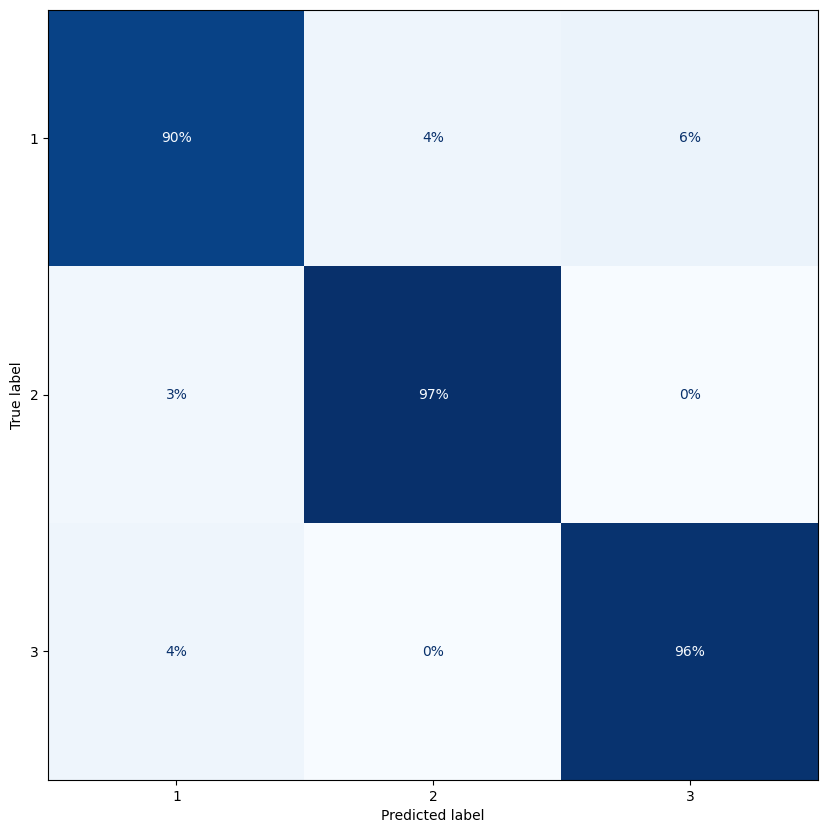

In [ ]:
# Arguments below can be changed as needed.
metrics.ConfusionMatrixDisplay.from_predictions(
    y,
    y_pred,
    normalize="true",
    values_format=".0%",
    cmap="Blues",
    colorbar=False,
    ax=plt.subplots(figsize=(10, 10))[1]
)

### Report Findings

The confusion matrix shows that the model is pretty accurate with the findings, with it predicting 1 90% of the time as 1, 2 97% as 2, and 3 96% as 3.